In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [ ]:
stars= pd.read_csv('/content/star_classification.csv')
stars.head()


obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

In [ ]:
stars.shape

(100000, 18)

In [ ]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
stars.describe().T

count          mean           std           min           25%  \
obj_ID       100000.0  1.237665e+18  8.438560e+12  1.237646e+18  1.237659e+18   
alpha        100000.0  1.776291e+02  9.650224e+01  5.527828e-03  1.275182e+02   
delta        100000.0  2.413530e+01  1.964467e+01 -1.878533e+01  5.146771e+00   
u            100000.0  2.198047e+01  3.176929e+01 -9.999000e+03  2.035235e+01   
g            100000.0  2.053139e+01  3.175029e+01 -9.999000e+03  1.896523e+01   
r            100000.0  1.964576e+01  1.854760e+00  9.822070e+00  1.813583e+01   
i            100000.0  1.908485e+01  1.757895e+00  9.469903e+00  1.773228e+01   
z            100000.0  1.866881e+01  3.172815e+01 -9.999000e+03  1.746068e+01   
run_ID       100000.0  4.481366e+03  1.964765e+03  1.090000e+02  3.187000e+03   
rerun_ID     100000.0  3.010000e+02  0.000000e+00  3.010000e+02  3.010000e+02   
cam_col      100000.0  3.511610e+00  1.586912e+00  1.000000e+00  2.000000e+00   
field_ID     100000.0  1.861305e+02  1.490111e+02  1.100000e+01  8.200000e+01   
spec_obj_ID  100000.0  5.783882e+18  3.324016e+18  2.995191e+17  2.844138e+18   
redshift     100000.0  5.766608e-01  7.307073e-01 -9.970667e-03  5.451684e-02   
plate        100000.0  5.137010e+03  2.952303e+03  2.660000e+02  2.526000e+03   
MJD          100000.0  5.558865e+04  1.808484e+03  5.160800e+04  5.423400e+04   
fiber_ID     100000.0  4.493127e+02  2.724984e+02  1.000000e+00  2.210000e+02   

                      50%           75%           max  
obj_ID       1.237663e+18  1.237668e+18  1.237681e+18  
alpha        1.809007e+02  2.338950e+02  3.599998e+02  
delta        2.364592e+01  3.990155e+01  8.300052e+01  
u            2.217914e+01  2.368744e+01  3.278139e+01  
g            2.109983e+01  2.212377e+01  3.160224e+01  
r            2.012529e+01  2.104478e+01  2.957186e+01  
i            1.940514e+01  2.039650e+01  3.214147e+01  
z            1.900460e+01  1.992112e+01  2.938374e+01  
run_ID       4.188000e+03  5.326000e+03  8.162000e+03  
rerun_ID     3.010000e+02  3.010000e+02  3.010000e+02  
cam_col      4.000000e+00  5.000000e+00  6.000000e+00  
field_ID     1.460000e+02  2.410000e+02  9.890000e+02  
spec_obj_ID  5.614883e+18  8.332144e+18  1.412694e+19  
redshift     4.241733e-01  7.041543e-01  7.011245e+00  
plate        4.987000e+03  7.400250e+03  1.254700e+04  
MJD          5.586850e+04  5.677700e+04  5.893200e+04  
fiber_ID     4.330000e+02  6.450000e+02  1.000000e+03

In [ ]:
stars.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [ ]:
stars.isnull()

obj_ID  alpha  delta      u      g      r      i      z  run_ID  \
0       False  False  False  False  False  False  False  False   False   
1       False  False  False  False  False  False  False  False   False   
2       False  False  False  False  False  False  False  False   False   
3       False  False  False  False  False  False  False  False   False   
4       False  False  False  False  False  False  False  False   False   
...       ...    ...    ...    ...    ...    ...    ...    ...     ...   
99995   False  False  False  False  False  False  False  False   False   
99996   False  False  False  False  False  False  False  False   False   
99997   False  False  False  False  False  False  False  False   False   
99998   False  False  False  False  False  False  False  False   False   
99999   False  False  False  False  False  False  False  False   False   

       rerun_ID  cam_col  field_ID  spec_obj_ID  class  redshift  plate  \
0         False    False     False        False  False     False  False   
1         False    False     False        False  False     False  False   
2         False    False     False        False  False     False  False   
3         False    False     False        False  False     False  False   
4         False    False     False        False  False     False  False   
...         ...      ...       ...          ...    ...       ...    ...   
99995     False    False     False        False  False     False  False   
99996     False    False     False        False  False     False  False   
99997     False    False     False        False  False     False  False   
99998     False    False     False        False  False     False  False   
99999     False    False     False        False  False     False  False   

         MJD  fiber_ID  
0      False     False  
1      False     False  
2      False     False  
3      False     False  
4      False     False  
...      ...       ...  
99995  False     False  
99996  False     False  
99997  False     False  
99998  False     False  
99999  False     False  

[100000 rows x 18 columns]

In [ ]:
stars["class"].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

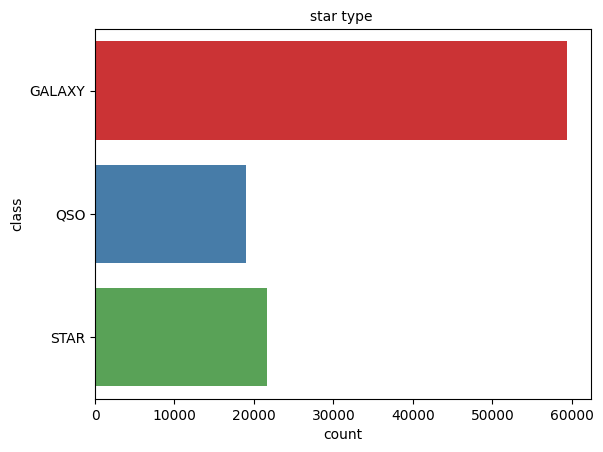

In [ ]:
sns.countplot(y = stars["class"], palette="Set1")
plt.title("star type ",fontsize=10)
plt.show()

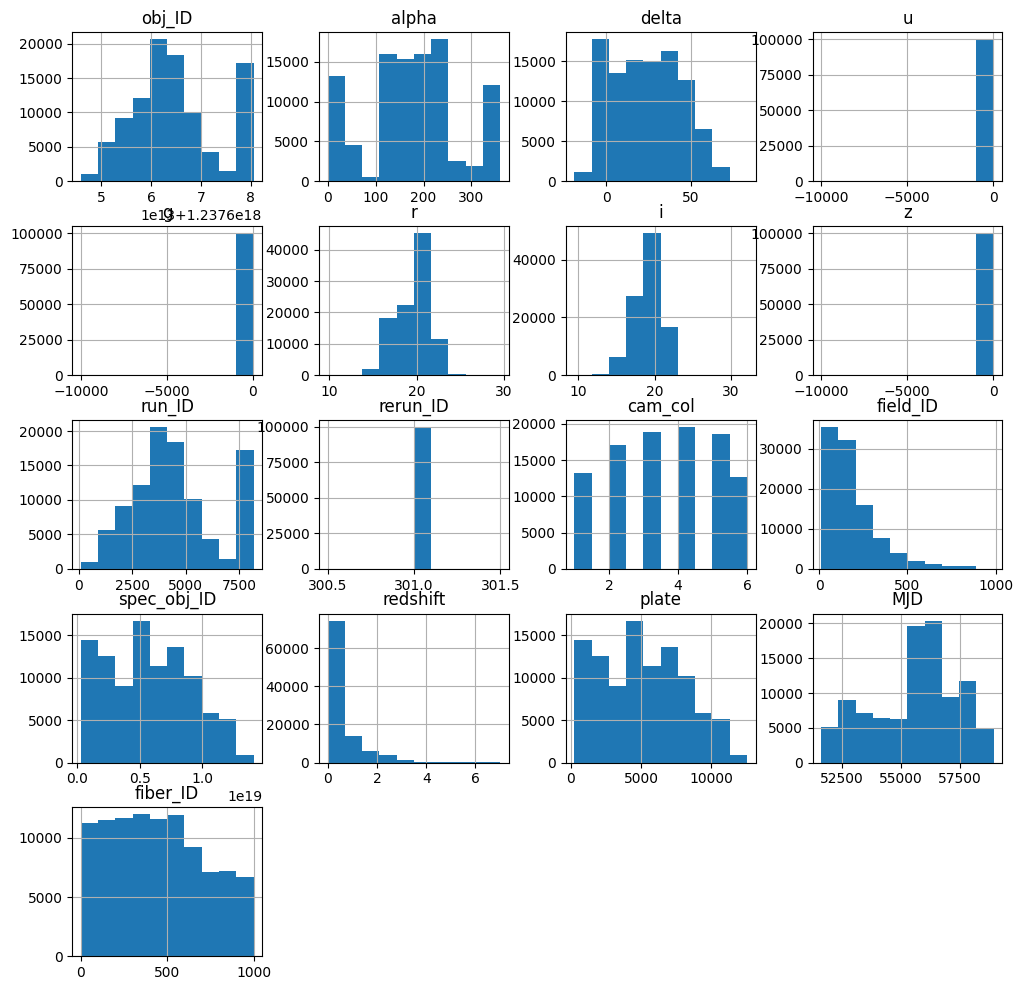

In [ ]:
stars.hist(bins = 10 , figsize= (12,12))
plt.show()

In [ ]:
stars.columns


Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [ ]:
hist = px.histogram(stars, x="redshift")
hist.show()

In [ ]:
hist1 = px.histogram(stars, x="spec_obj_ID")
hist1.show()

In [ ]:
import plotly.express as ex
ex.pie(stars,names='class',title='stars')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

y=stars['class'] = label_encoder.fit_transform(stars['class'])

In [ ]:
stars.tail()

obj_ID       alpha      delta         u         g         r  \
99995  1.237679e+18   39.620709  -2.594074  22.16759  22.97586  21.90404   
99996  1.237679e+18   29.493819  19.798874  22.69118  22.38628  20.45003   
99997  1.237668e+18  224.587407  15.700707  21.16916  19.26997  18.20428   
99998  1.237661e+18  212.268621  46.660365  25.35039  21.63757  19.91386   
99999  1.237661e+18  196.896053  49.464643  22.62171  21.79745  20.60115   

              i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
99995  21.30548  20.73569    7778       301        2       581  1.055431e+19   
99996  19.75759  19.41526    7917       301        1       289  8.586351e+18   
99997  17.69034  17.35221    5314       301        4       308  3.112008e+18   
99998  19.07254  18.62482    3650       301        4       131  7.601080e+18   
99999  20.00959  19.28075    3650       301        4        60  8.343152e+18   

       class  redshift  plate    MJD  fiber_ID  
99995      0  0.000000   9374  57749       438  
99996      0  0.404895   7626  56934       866  
99997      0  0.143366   2764  54535        74  
99998      0  0.455040   6751  56368       470  
99999      0  0.542944   7410  57104       851

In [ ]:
stars = stars.drop(['obj_ID','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)
x=stars.drop('class',axis=1)
y=stars["class"]

In [ ]:
x

alpha      delta         u         g         r         i  \
0      135.689107  32.494632  23.87882  22.27530  20.39501  19.16573   
1      144.826101  31.274185  24.77759  22.83188  22.58444  21.16812   
2      142.188790  35.582444  25.26307  22.66389  20.60976  19.34857   
3      338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454   
4      345.282593  21.183866  19.43718  17.58028  16.49747  15.97711   
...           ...        ...       ...       ...       ...       ...   
99995   39.620709  -2.594074  22.16759  22.97586  21.90404  21.30548   
99996   29.493819  19.798874  22.69118  22.38628  20.45003  19.75759   
99997  224.587407  15.700707  21.16916  19.26997  18.20428  17.69034   
99998  212.268621  46.660365  25.35039  21.63757  19.91386  19.07254   
99999  196.896053  49.464643  22.62171  21.79745  20.60115  20.00959   

              z   spec_obj_ID  redshift  plate    MJD  
0      18.79371  6.543777e+18  0.634794   5812  56354  
1      21.61427  1.176014e+19  0.779136  10445  58158  
2      18.94827  5.152200e+18  0.644195   4576  55592  
3      19.25010  1.030107e+19  0.932346   9149  58039  
4      15.54461  6.891865e+18  0.116123   6121  56187  
...         ...           ...       ...    ...    ...  
99995  20.73569  1.055431e+19  0.000000   9374  57749  
99996  19.41526  8.586351e+18  0.404895   7626  56934  
99997  17.35221  3.112008e+18  0.143366   2764  54535  
99998  18.62482  7.601080e+18  0.455040   6751  56368  
99999  19.28075  8.343152e+18  0.542944   7410  57104  

[100000 rows x 11 columns]

In [ ]:
y #class

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: class, Length: 100000, dtype: int64

In [ ]:
y[6]

1

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)



In [ ]:
from sklearn import svm
svm_clf = svm.SVC(kernel='rbf', C=1, random_state=0)
svm_clf.fit(x_train,y_train)
predicted = svm_clf.predict(x_test)
score = svm_clf.score(x_test, y_test)
svm_score_ = np.mean(score)

print('Accuracy : %.3f' % (svm_score_))

Accuracy : 0.594


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [39]:
from sklearn import svm
svm_clf = svm.SVC(kernel='rbf', C=1, random_state=0)
svm_clf.fit(x_train,y_train)
predicted = svm_clf.predict(x_test)
score = svm_clf.score(x_test, y_test)
svm_score_ = np.mean(score)

print('Accuracy : %.3f' % (svm_score_))

Accuracy : 0.960


In [ ]:

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ConfusionMatrix

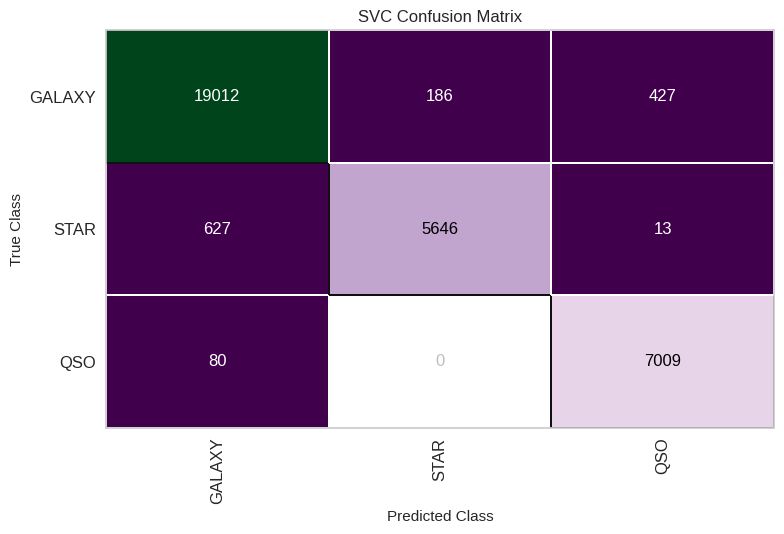

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
svm_cm = ConfusionMatrix(svm_clf, classes=['GALAXY','STAR','QSO'],cmap='PRGn')

svm_cm.fit(x_train, y_train)
svm_cm.score(x_test, y_test)
svm_cm.show()

In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     19625
           1       0.97      0.90      0.93      6286
           2       0.94      0.99      0.96      7089

    accuracy                           0.96     33000
   macro avg       0.96      0.95      0.95     33000
weighted avg       0.96      0.96      0.96     33000



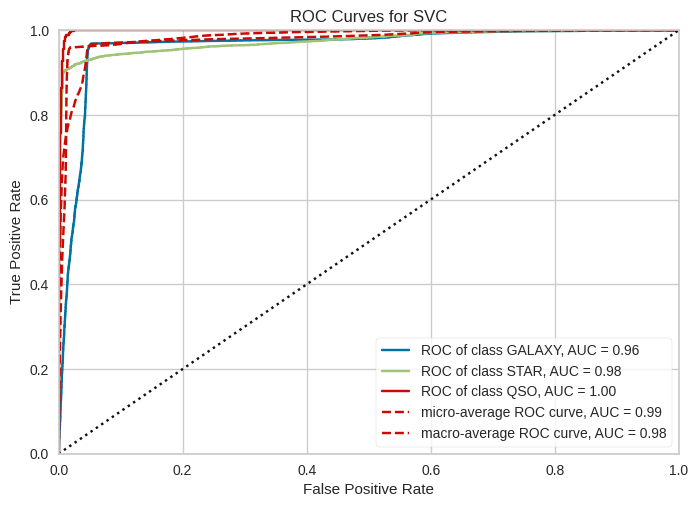

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(svm_clf, classes=['GALAXY','STAR','QSO'])

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()  

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

for k in range(1, 10):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(x_train, y_train)
    predicted = knn_clf.predict(x_test)
    score = knn_clf.score(x_test, y_test)
    knn_score = np.mean(score)
    print('Accuracy for k=%d: %.3f' % (k, knn_score))

Accuracy for k=1: 0.934
Accuracy for k=2: 0.928
Accuracy for k=3: 0.942
Accuracy for k=4: 0.937
Accuracy for k=5: 0.941
Accuracy for k=6: 0.937
Accuracy for k=7: 0.939
Accuracy for k=8: 0.936
Accuracy for k=9: 0.937


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()
gnb_clf.fit(x_train, y_train)
predicted = gnb_clf.predict(x_test)
score = gnb_clf.score(x_test, y_test)
nb_score = np.mean(score)

print('Accuracy: %.3f' % nb_score)

Accuracy: 0.884


In [35]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree = DecisionTreeClassifier(criterion='entropy')
ap_tree = tree.fit(x, y)


In [36]:
print(type(ap_tree))
print(type(tree))
print(ap_tree == tree)


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
True


In [37]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source

dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

tree_data = export_graphviz(dt_clf, out_file=None,
                      class_names=['GALAXY','STAR','QSO'],  
                      filled=True, rounded=True,  
                      special_characters=True)  

graph = Source(tree_data)
graph

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)
predicted = dt_clf.predict(x_test)
score = dt_clf.score(x_test, y_test)
dt_score = np.mean(score)

print('Accuracy: %.3f' % dt_score)

Accuracy: 0.966


**final**